In [238]:
# load liberaries

# pandas
import pandas as pd
from pandas import Series,DataFrame
from patsy import dmatrices, dmatrix, demo_data

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import re

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [239]:
# get titanic & test csv files as a DataFrame
df_all = pd.read_csv("C:/Users/I011708/Desktop/train.csv", dtype={"Age": np.float64},)
#split dataset into train and testfile
#titanic_df=df_all.head(445)#take first part of ds for training (since random)
#test_df=df_all.tail(len(df_all)-445)#take second part for testing
###for submission
titanic_df=df_all
test_df= pd.read_csv("C:/Users/I011708/Desktop/test.csv", dtype={"Age": np.float64},)
# complete dataset overview
df_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [240]:
##############################################descriptives################################################
###function to calculate survival probability
def surviver_prob(pclass, survived, class_to_be_checked):
      n_died=df_all.groupby([pclass,survived]).Survived.count()[class_to_be_checked,0]
      n_survived=df_all.groupby([pclass,survived]).Survived.count()[class_to_be_checked,1]
      N_total=n_died+n_survived
      print "Died: ", float(n_died)/float(N_total)
      print "Survived: ", float(n_survived)/(N_total)
      return   

In [241]:
###calculate survival rate for class ang gender
print "survival rate class 1"
surviver_prob("Pclass","Survived",1)
print "survival rate class 2"
surviver_prob("Pclass","Survived",2)
print "survival rate class 3"
surviver_prob("Pclass","Survived",3)

print "survival rate female"
surviver_prob("Sex","Survived","female")
print "survival rate male"
surviver_prob("Sex","Survived","male")

survival rate class 1
Died:  0.37037037037
Survived:  0.62962962963
survival rate class 2
Died:  0.527173913043
Survived:  0.472826086957
survival rate class 3
Died:  0.757637474542
Survived:  0.242362525458
survival rate female
Died:  0.257961783439
Survived:  0.742038216561
survival rate male
Died:  0.811091854419
Survived:  0.188908145581


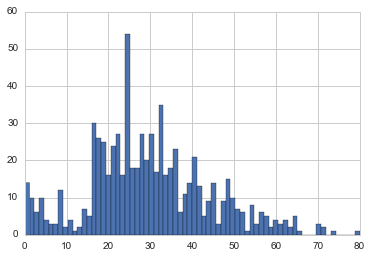

In [242]:
########some information about age 
df_all["Age"].describe()
df_all['Age'].dropna().astype(int).hist(bins=70)

survival rate male
Died:  0.46017699115
Survived:  0.53982300885
Died:  0.63881748072
Survived:  0.36118251928


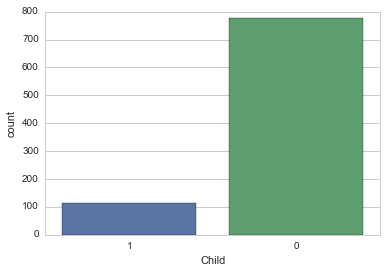

In [243]:

# All the ages with no data make the median of the data
mean_age=titanic_df['Age'].mean() 
mean_age=round(mean_age) 
titanic_df.loc[np.isnan(titanic_df.Age), 'Age'] = mean_age
titanic_df['Child']=titanic_df['Age']

titanic_df.loc[titanic_df.Child < 18, 'Child'] = 1#is a child 
titanic_df.loc[titanic_df.Child > 17, 'Child'] = 0# is an adult
sns.countplot(x='Child', data=titanic_df, order=[1,0])
print "survival rate male"
#calculate fraction of childrend/adults which survived
surviver_prob("Child","Survived",1)#for child
surviver_prob("Child","Survived",0)#for adults

In [244]:
# Convert strings to numbers so we can perform computational analysis    
# The gender classifier in column 3: Male = 0, female = 1:
titanic_df.loc[titanic_df.Sex != 'female', 'Sex'] = 0
titanic_df.loc[titanic_df.Sex == 'female', 'Sex'] = 1


In [245]:
# same for Embarked C = 0, S = 1, Q = 2
#titanic_df['Embarked']
#titanic_df['Embarked']=titanic_df['Embarked'].replace("C",0).replace("S",1).replace("Q",2) 
titanic_df.loc[titanic_df.Embarked == 'C', 'Embarked'] = 0
titanic_df.loc[titanic_df.Embarked == 'S', 'Embarked'] = 1
titanic_df.loc[titanic_df.Embarked == 'Q', 'Embarked'] = 2
#replace nas in embarked with most common embarked
mean_embarked=titanic_df['Embarked'].mean() 
mean_embarked=round(mean_embarked) 
titanic_df.loc[pd.isnull(titanic_df.Embarked), 'Embarked'] = mean_embarked
titanic_df[60:70]
#####replace nas in fare by mean value
mean_fare=titanic_df['Fare'].mean() 
mean_fare=round(mean_age) 
titanic_df.loc[np.isnan(titanic_df.Fare), 'Fare'] = mean_fare


In [246]:
#additional name information
titanic_df["Title"]=titanic_df["Name"]
for irow in range(0,len(titanic_df["Name"])):
    titanic_df["Title"][irow]=re.sub('(.*, )|(\\..*)', '',titanic_df["Name"][irow])


C:\Program Files\Anaconda\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [247]:
###change names in coloumn "Name" and summarize all rare titles encode as 1-4
rare_title =('Dona', 'Lady', 'the Countess','Capt', 'Col', 'Don', 
                'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer','Master')
rare_title
titanic_df.loc[titanic_df.Title == 'Mlle', 'Title'] =1    #'Miss'
titanic_df.loc[titanic_df.Title == 'Ms', 'Title'] = 1 #'Miss'
titanic_df.loc[titanic_df.Title == 'Miss', 'Title'] = 1 #'Miss'
titanic_df.loc[titanic_df.Title == 'Mme', 'Title'] = 2 #'Mrs'
titanic_df.loc[titanic_df.Title == 'Mrs', 'Title'] = 2 #'Mrs'
titanic_df.loc[titanic_df.Title == 'Mr', 'Title'] = 3 # Mr
titanic_df.loc[titanic_df.Title.isin(rare_title), 'Title'] = 4 #'Rare Title'


In [248]:
#does the size of a family influence the probability of surviving
titanic_df["Fsize"]=titanic_df["SibSp"] + titanic_df["Parch"] + 1
titanic_df["Mother"]=titanic_df["SibSp"]
#titanic_df.loc[titanic_df.Sex == 1 and titanic_df.Parch > 0,'Mother']=1# #is mother
titanic_df.loc[(titanic_df.Parch >0) & (titanic_df.Sex==1),'Mother']=1
titanic_df.loc[(titanic_df.Parch ==0) | (titanic_df.Sex!=1),'Mother']=0
#titanic_df.loc[titanic_df.Sex != 1 or titanic_df.Parch == 0 or np.isnan(titanic_df.Parch),'Mother']=0 #no mother 

##fraction of women with child who survived
surviver_prob("Mother","Survived",1)#Mother
surviver_prob("Mother","Survived",0)#all others

Died:  0.333333333333
Survived:  0.666666666667
Died:  0.660181582361
Survived:  0.339818417639


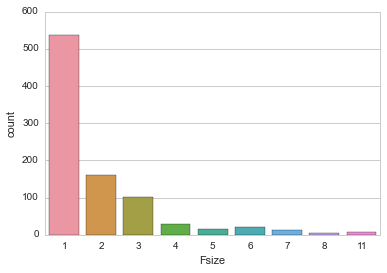

In [249]:
sns.countplot(x='Fsize', data=titanic_df)

In [250]:
####do the same for test data
# All the ages with no data make the median of the data
mean_age=test_df['Age'].mean()
mean_age=round(mean_age)
#print mean_age
test_df.loc[np.isnan(test_df.Age), 'Age'] = mean_age
test_df['Child']=test_df['Age']
test_df.loc[test_df.Child < 18, 'Child'] = 1#is a child 
test_df.loc[test_df.Child > 17, 'Child'] = 0# is an adult
test_df.loc[test_df.Sex != 'female', 'Sex'] = 0
test_df.loc[test_df.Sex == 'female', 'Sex'] = 1
test_df.loc[test_df.Embarked == 'C', 'Embarked'] = 0
test_df.loc[test_df.Embarked == 'S', 'Embarked'] = 1
test_df.loc[test_df.Embarked == 'Q', 'Embarked'] = 2
mean_embarked=test_df['Embarked'].mean() 
mean_embarked=round(mean_embarked) 
test_df.loc[pd.isnull(test_df.Embarked), 'Embarked'] = mean_embarked
mean_fare=test_df['Fare'].mean() 
mean_fare=round(mean_age) 
test_df.loc[np.isnan(test_df.Fare), 'Fare'] = mean_fare
test_df["Title"]=test_df["Name"]
for irow in range(0,len(test_df["Name"])):
    test_df["Title"][irow]=re.sub('(.*, )|(\\..*)', '',test_df["Name"][irow])
test_df.loc[test_df.Title == 'Mlle', 'Title'] =1    #'Miss'
test_df.loc[test_df.Title == 'Ms', 'Title'] = 1 #'Miss'
test_df.loc[test_df.Title == 'Miss', 'Title'] = 1
test_df.loc[test_df.Title == 'Mme', 'Title'] = 2 #'Mrs'
test_df.loc[test_df.Title == 'Mrs', 'Title'] = 2 #'Mrs'
test_df.loc[test_df.Title == 'Mr', 'Title'] = 3 # Mr
test_df.loc[test_df.Title.isin(rare_title), 'Title'] = 4 #'Rare Title'
test_df["Fsize"]=test_df["SibSp"] + test_df["Parch"] + 1
test_df["Mother"]=test_df["SibSp"]
test_df.loc[(test_df.Parch >0) & (test_df.Sex==1),'Mother']=1 #is mother
test_df.loc[(test_df.Parch <0) & (test_df.Sex!=1),'Mother']=0 #no mother 

C:\Program Files\Anaconda\lib\site-packages\IPython\kernel\__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [251]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child,Title,Fsize,Mother
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,0,3,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,1,0,2,2,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2,0,3,1,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,1,0,3,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,1,0,2,3,1
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,1,1,3,1,0
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,NaN,2,0,1,1,0
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,1,0,3,3,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,NaN,0,0,2,1,0
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,NaN,1,0,3,3,2


In [252]:
##########additional stuff
passenger_df=test_df['PassengerId']
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
test_df    = test_df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
#PassengerId
#Survived
#Pclass
#Name
#Sex
#Age
#SibSp
#Parch
#Ticket
#Fare
#Cabin
#Embarked

In [253]:
X_train = titanic_df.drop("Survived",axis=1)
Y_train = titanic_df["Survived"]
#X_test  = test_df.drop("Survived",axis=1)#for training phase
X_test  = test_df

In [254]:
#X_train
#Y_train
#check for nulls and nans
#X_test.isnull().values.any()
pd.isnull(X_test).any(1).nonzero()[0]
X_test[150:155]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Child,Title,Fsize,Mother
150,1,1,23.0,0,1,83.1583,0,0,2,2,1
151,3,0,30.0,0,0,7.8958,0,0,3,1,0
152,3,0,60.5,0,0,30.0000,1,0,3,1,0
153,3,1,36.0,0,2,12.1833,1,0,2,3,1
154,3,0,13.0,4,2,31.3875,1,1,4,7,4


In [255]:

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
logreg.score(X_train, Y_train)
#score: 0.81573033707865172


0.81144781144781142

In [256]:
#####better algorithm
#random_forest = RandomForestClassifier(n_estimators=100)

#random_forest.fit(X_train, Y_train)

#Y_pred = random_forest.predict(X_test)

#random_forest.score(X_train, Y_train)


In [257]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Child,Title,Fsize,Mother
0,3,0,34.5,0,0,7.8292,2,0,3,1,0
1,3,1,47.0,1,0,7.0000,1,0,2,2,1
2,2,0,62.0,0,0,9.6875,2,0,3,1,0
3,3,0,27.0,0,0,8.6625,1,0,3,1,0
4,3,1,22.0,1,1,12.2875,1,0,2,3,1
5,3,0,14.0,0,0,9.2250,1,1,3,1,0
6,3,1,30.0,0,0,7.6292,2,0,1,1,0
7,2,0,26.0,1,1,29.0000,1,0,3,3,1
8,3,1,18.0,0,0,7.2292,0,0,2,1,0
9,3,0,21.0,2,0,24.1500,1,0,3,3,2


In [259]:
submission = pd.DataFrame({
        "PassengerId": passenger_df,
        "Survived": Y_pred
    })
submission.to_csv('C:/Users/I011708/Desktop/prediction_titanic.csv', index=False)